In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("loans.csv", index_col= 'client_id')
df.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
client_id,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


In [5]:
df.shape

(443, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 443 entries, 46109 to 26945
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   loan_type    443 non-null    object 
 1   loan_amount  443 non-null    int64  
 2   repaid       443 non-null    int64  
 3   loan_id      443 non-null    int64  
 4   loan_start   443 non-null    object 
 5   loan_end     443 non-null    object 
 6   rate         443 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 27.7+ KB


## **Checking the datatypes of the columns**

In [7]:
df.dtypes

,0
loan_type,object
loan_amount,int64
repaid,int64
loan_id,int64
loan_start,object
loan_end,object
rate,float64


In [8]:
df['loan_id'] = df['loan_id'].astype('object')
df['repaid'] = df['repaid'].astype('category')

In [9]:
df['loan_start'] = pd.to_datetime(df['loan_start'], format = '%Y-%m-%d')
df['loan_end'] = pd.to_datetime(df['loan_end'], format= '%Y-%m-%d')

In [10]:
df.dtypes

,0
loan_type,object
loan_amount,int64
repaid,category
loan_id,object
loan_start,datetime64[ns]
loan_end,datetime64[ns]
rate,float64


In [11]:
df.describe()

,loan_amount,loan_start,loan_end,rate
count,443.000000,443,443,443.000000
mean,7982.311512,2007-08-02 12:56:53.092550912,2009-08-23 11:35:37.246049536,3.217156
min,559.000000,2000-01-26 00:00:00,2001-08-02 00:00:00,0.010000
25%,4232.500000,2003-10-19 00:00:00,2005-09-12 12:00:00,1.220000
50%,8320.000000,2007-03-10 00:00:00,2009-03-19 00:00:00,2.780000
75%,11739.000000,2011-07-31 00:00:00,2013-09-11 12:00:00,4.750000
max,14971.000000,2014-11-11 00:00:00,2017-05-07 00:00:00,12.620000
std,4172.891992,NaN,NaN,2.397168


In [12]:
df.describe(exclude=[np.number])

,loan_type,repaid,loan_id,loan_start,loan_end
count,443,443.0,443.0,443,443
unique,4,2.0,443.0,NaN,NaN
top,home,1.0,10243.0,NaN,NaN
freq,121,237.0,1.0,NaN,NaN
mean,NaN,NaN,NaN,2007-08-02 12:56:53.092550912,2009-08-23 11:35:37.246049536
min,NaN,NaN,NaN,2000-01-26 00:00:00,2001-08-02 00:00:00
25%,NaN,NaN,NaN,2003-10-19 00:00:00,2005-09-12 12:00:00
50%,NaN,NaN,NaN,2007-03-10 00:00:00,2009-03-19 00:00:00
75%,NaN,NaN,NaN,2011-07-31 00:00:00,2013-09-11 12:00:00
max,NaN,NaN,NaN,2014-11-11 00:00:00,2017-05-07 00:00:00


In [13]:
df.isnull().sum()

,0
loan_type,0
loan_amount,0
repaid,0
loan_id,0
loan_start,0
loan_end,0
rate,0


# To identify the outliers:
- We use box plot.
- Box plots, also known as box-and-whisker plots, are a type of graph that summarizes data and shows how it's distributed. They're useful for comparing different sets of data and can help you answer questions like:
  - What's the distribution of the data?
  - Are there any outliers?
  - What's the variation in the spread of different series?

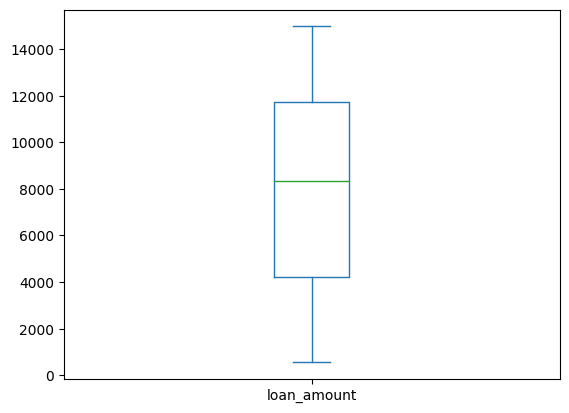

In [14]:
# For loan amount:
df['loan_amount'].plot(kind='box')
plt.show()

We can see that there are no outliers in the loan_amount column and some outliers are present in the rate column. To treat for outliers can either cap the values or transform the data. Shall demonstrate both the approaches here

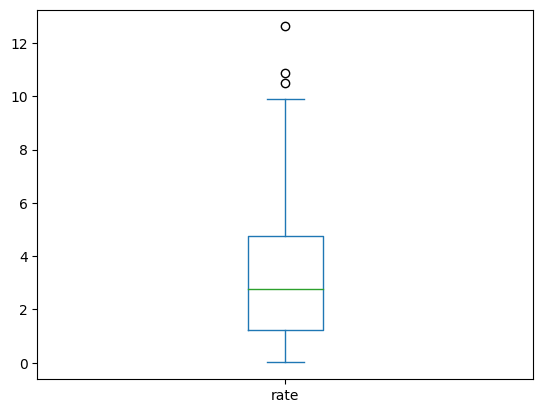

In [15]:
# for rate:
df['rate'].plot(kind='box')
plt.show()

# Transformation
**1. SQRT Transformation**

In [16]:
df['SQRT_RATE'] = df['rate']**0.5

In [17]:
df['sqrt_rate'] = np.sqrt (df['rate'])

In [18]:
df.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,SQRT_RATE,sqrt_rate
client_id,,,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,1.466288,1.466288
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,1.118034,1.118034
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,0.824621,0.824621
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,1.113553,1.113553
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,1.769181,1.769181


In [19]:
#checking the skewness, kurtosis between the original and transformed data:
print(f"The skewness of the original data is {df.rate.skew()}")
print(f"The skewness of the SQRT transformed data is {df.SQRT_RATE.skew()}")

print('')
print(f"The kurtosis of the original data is {df.rate.kurtosis()}")
print(f"The kurtosis of the SQRT transformed data is {df.SQRT_RATE.kurtosis()}")

The skewness of the original data is 0.884204614329943
The skewness of the SQRT transformed data is 0.04964154055528862

The kurtosis of the original data is 0.42437165143736433
The kurtosis of the SQRT transformed data is -0.6318437642052039


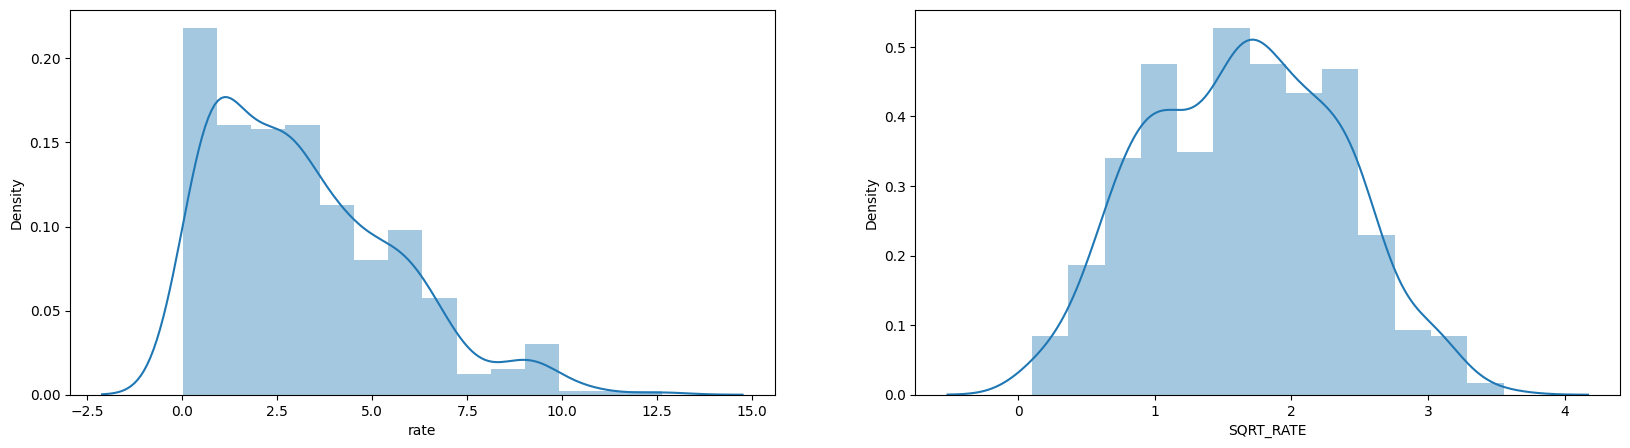

In [20]:
fig, axis = plt.subplots(1,2, figsize=(20,5))
sns.distplot(df.rate, ax=axis[0])
sns.distplot(df.SQRT_RATE, ax=axis[1])
plt.show()

**2. Log Transformation**

In [21]:
df['Log_Rate'] = np.log(df['rate'])

In [22]:
df.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,SQRT_RATE,sqrt_rate,Log_Rate
client_id,,,,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,1.466288,1.466288,0.765468
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,1.118034,1.118034,0.223144
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,0.824621,0.824621,-0.385662
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,1.113553,1.113553,0.215111
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,1.769181,1.769181,1.141033


In [23]:
print(f"The skewness of the original data is {df.rate.skew()}")
print(f"The skewness of the SQRT transformed data is {df.SQRT_RATE.skew()}")
print(f"The skewness of the Log transformed data is {df.Log_Rate.skew()}")


print('')
print(f"The kurtosis of the original data is {df.rate.kurtosis()}")
print(f"The kurtosis of the SQRT transformed data is {df.SQRT_RATE.kurtosis()}")
print(f"The kurtosis of the Log transformed data is {df.Log_Rate.kurtosis()}")

The skewness of the original data is 0.884204614329943
The skewness of the SQRT transformed data is 0.04964154055528862
The skewness of the Log transformed data is -1.5943217626331552

The kurtosis of the original data is 0.42437165143736433
The kurtosis of the SQRT transformed data is -0.6318437642052039
The kurtosis of the Log transformed data is 4.157026150198228


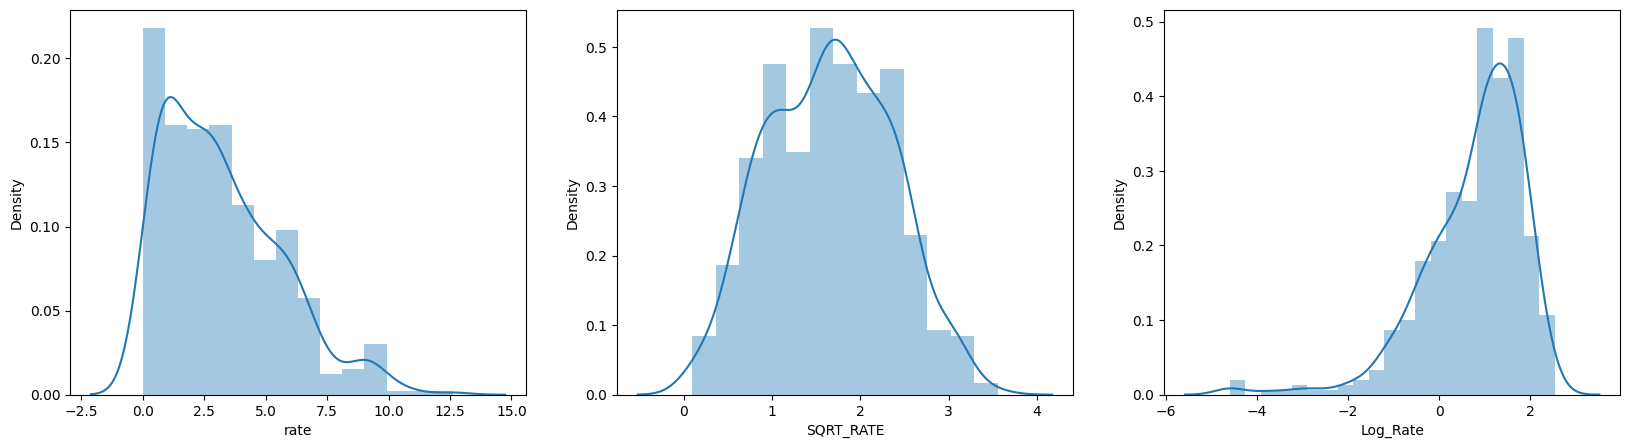

In [24]:
fig, axis = plt.subplots(1,3, figsize=(20,5))
sns.distplot(df.rate, ax=axis[0])
sns.distplot(df.SQRT_RATE, ax=axis[1])
sns.distplot(df.Log_Rate, ax=axis[2])
plt.show()

As we can see in the above that the log transformation increases the skewness od the data

# Outliers Treatment using Capping Approach
**1. Z-Score approach to treat Outliers:**
- All the values above 3 standard deviation and below -3 standard deviation are outliers and can be removed

In [25]:
df1 = pd.read_csv('loans.csv', index_col = 'client_id')
df1.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
client_id,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


In [26]:
df['loan_start'] = pd.to_datetime(df['loan_start'], format = '%Y-%m-%d')
df['loan_end'] = pd.to_datetime(df['loan_end'], format= '%Y-%m-%d')

In [27]:
df['loan_id'] = df['loan_id'].astype('object')
df['repaid'] = df['repaid'].astype('category')

In [28]:
#'Scipy' is also used to perform the scientific computations
import scipy.stats as stats

In [29]:
df1['ZR'] = stats.zscore(df1['rate'])


In [30]:
df1.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,ZR
client_id,,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,-0.445677
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,-0.821544
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,-1.059594
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,-0.825721
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,-0.036399


In [31]:
# Combining the lower limit rate and the upper limit rate
df1[(df1['ZR']<-3) | (df1['ZR']>3)]

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,ZR
client_id,,,,,,,,
41480,credit,2947,1,10302,2005-11-10,2008-03-16,10.49,3.037362
48177,other,6318,0,10224,2003-02-02,2005-05-08,10.89,3.204415
49624,home,8133,1,10312,2009-03-14,2011-03-21,12.62,3.926916


In [32]:
#Count of the outliers:
df1[(df1['ZR']<-3) | (df1['ZR']>3)].count()

,0
loan_type,3
loan_amount,3
repaid,3
loan_id,3
loan_start,3
loan_end,3
rate,3
ZR,3


In [33]:
df2 = df1[(df1['ZR']>-3) & (df1['ZR']<3)].reset_index()
df2.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,ZR
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,-0.445677
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,-0.821544
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,-1.059594
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,-0.825721
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,-0.036399


In [34]:
df1.shape

(443, 8)

In [35]:
df2.shape

(440, 9)

In [36]:
df3 = df2.copy()

In [37]:
df3.drop('ZR', axis=1, inplace=True)
df3.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


# IQR Method to treat Outliers:
-  It is based on the Interquartile Range (IQR), which measures the spread of the middle 50% of the data.
- All the values below Q1 - 1.5IQR and values above Q3 + 1.5IQR are outliers and can be removed.

In [38]:
# Finding the Quantiles:

Q1 = df3['rate'].quantile(0.25)
Q2 = df3['rate'].quantile(0.50)
Q3 = df3['rate'].quantile(0.75)

# IQR: Inter-Quartile Range:

IQR = Q3-Q1

#Uper Limit and the lower Limit:
Upper_Limit = Q3 + (1.5*IQR)
Lower_Limit = Q1 - (1.5*IQR)

print(f"The lower limit is {Lower_Limit}")
print(f"The upper limit is {Upper_Limit}")

The lower limit is -3.9762499999999994
The upper limit is 9.87375


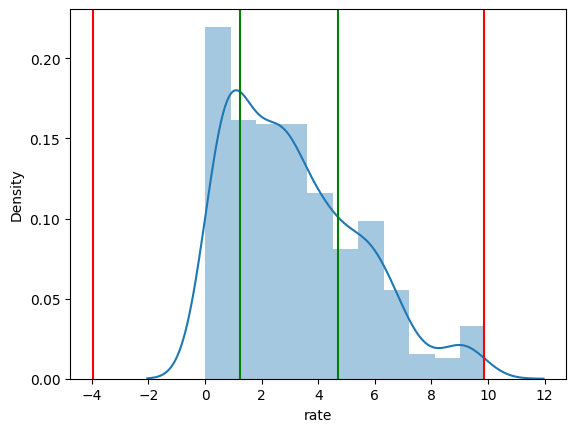

In [39]:
sns.distplot(df3['rate'])
plt.axvline(Upper_Limit, color='r')
plt.axvline(Lower_Limit, color ='r')
plt.axvline(Q1, color='g')
plt.axvline(Q3, color='g')
plt.show()

In [40]:
df3[(df3.rate<Lower_Limit) | (df3.rate>Upper_Limit)].reset_index(drop=True)

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
0,39505,cash,11647,1,11928,2003-07-28,2005-12-24,9.91


In [41]:
df4 = df3[(df3.rate>Lower_Limit) & (df3.rate<Upper_Limit)]
df4.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


In [42]:
df4.shape

(439, 8)

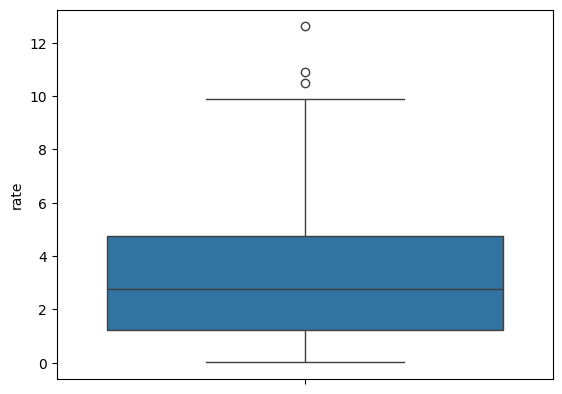

In [43]:
# Box plot of the original data
sns.boxplot(df1['rate'])
plt.show()

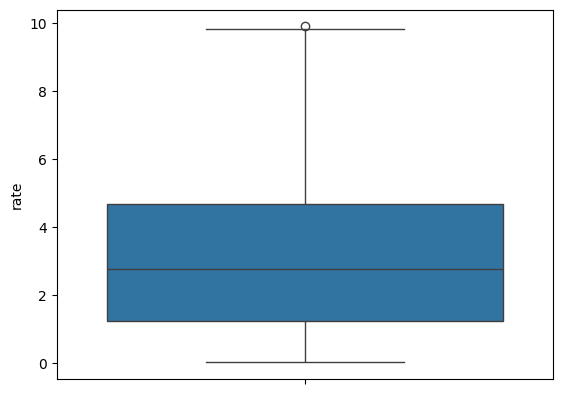

In [44]:
# Box plot for rate based on Z-score cleaned data:

sns.boxplot(df2['rate'])
plt.show()

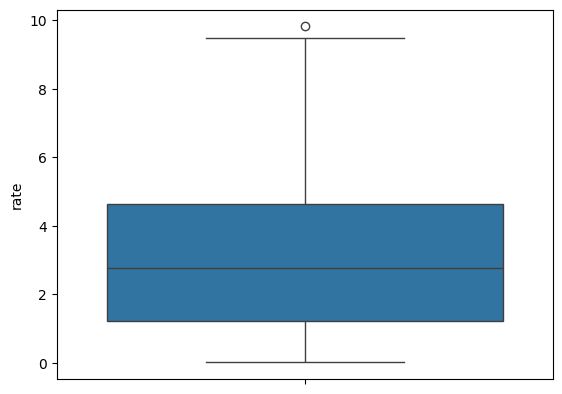

In [45]:
# Box plot for rate based on the cleaned data
sns.boxplot(df4['rate'])
plt.show()

# Scaling the Numerical Features
There are two ways to scale the data:

- Standardization (Z-Score)\
- Normalization: Min Max Scalar

In [46]:
# For Rate:
avg_rate = df3['rate'].mean()
std_rate = df3['rate'].std()

df3['Z_Score_Rate'] = (df3['rate']-avg_rate)/std_rate
df3.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,Z_Score_Rate
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,-0.438406
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,-0.828363
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,-1.075336
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,-0.832696
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,-0.013786


In [47]:
# Checking the skewness and the kurtosis post scaling or not:

print(f"The skewness for the original data is {df3.rate.skew()}")
print(f"The skewness for the Z-score scaled data is {df3.Z_Score_Rate.skew()}")

print('')
print(f"The kurtosis for the original data is {df3.rate.kurtosis()}")
print(f"The kurtosis for the Z-score scaled data is {df3.Z_Score_Rate.kurtosis()}")

The skewness for the original data is 0.7594062707815686
The skewness for the Z-score scaled data is 0.7594062707815692

The kurtosis for the original data is -0.05964248048746912
The kurtosis for the Z-score scaled data is -0.05964248048746734


In [48]:
# for loan:
avg_loan = df3['loan_amount'].mean()
std_loan = df3['loan_amount'].std()

df3['Z_Score_Loan'] = (df3['loan_amount']-avg_loan)/std_loan
df3.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,Z_Score_Rate,Z_Score_Loan
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,-0.438406,1.357792
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,-0.828363,0.429916
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,-1.075336,1.133360
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,-0.832696,1.081678
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,-0.013786,1.447996


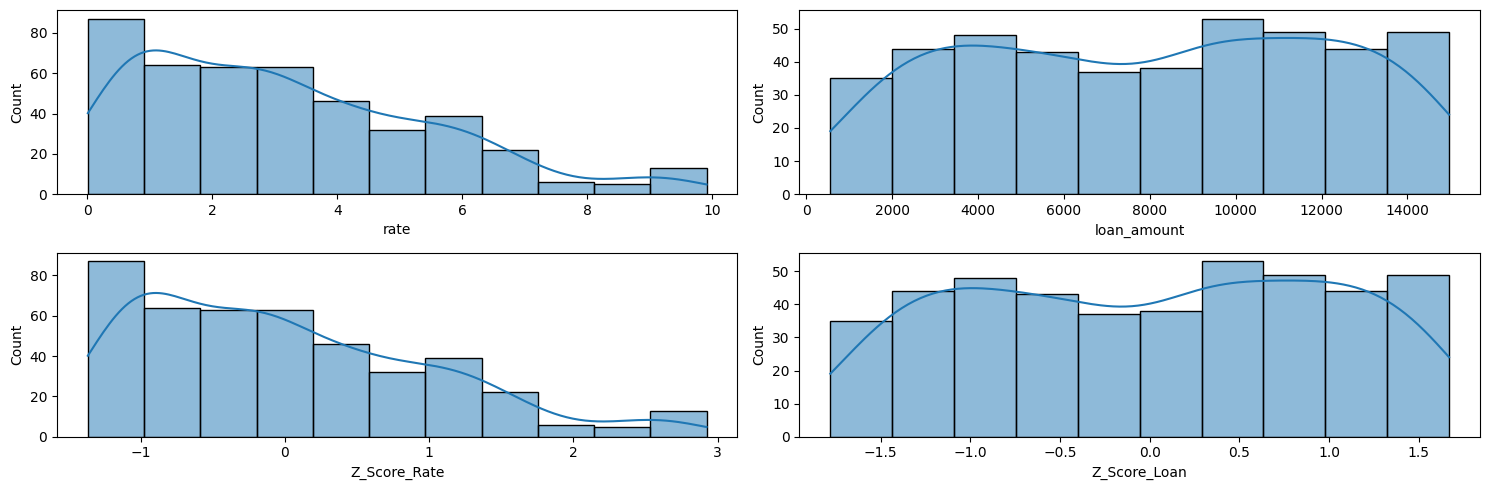

In [64]:
fig, axes = plt.subplots(2,2, figsize=(15,5))

sns.histplot(df3['rate'], ax=axes[0,0], kde= True)
sns.histplot(df3['loan_amount'], ax=axes[0,1], kde= True)
sns.histplot(df3['Z_Score_Rate'], ax=axes[1,0], kde= True)
sns.histplot(df3['Z_Score_Loan'], ax=axes[1,1], kde= True)
plt.tight_layout()

plt.show()

In [54]:
# Using sklearn library:
from sklearn.preprocessing import StandardScaler

df4 = df3.copy()
df4.drop(columns = ['Z_Score_Rate'], inplace=True)
df4.drop(columns = ['Z_Score_Loan'], inplace=True)
df4.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


In [55]:
df4_num = df[['loan_amount','rate']]
df4_num.head()

,loan_amount,rate
client_id,,
46109,13672,2.15
46109,9794,1.25
46109,12734,0.68
46109,12518,1.24
46109,14049,3.13


In [57]:
scaler = StandardScaler()

scaled_x = scaler.fit_transform(df4_num)
scaled_x

array([[ 1.36502962e+00, -4.45676908e-01],
       [ 4.34647423e-01, -8.21544457e-01],
       [ 1.13999132e+00, -1.05959390e+00],
       [ 1.08817014e+00, -8.25720763e-01],
       [ 1.45547678e+00, -3.63989115e-02],
       [-2.51263533e-01, -5.33379336e-01],
       [-4.33117505e-01,  2.61555546e+00],
       [ 1.12127812e+00,  3.85408004e-01],
       [ 7.38856969e-01,  9.45033020e-01],
       [-9.43412224e-01,  4.35523677e-01],
       [-1.52688038e+00,  1.36683993e+00],
       [ 1.01648330e-01, -1.13476741e+00],
       [ 2.57831622e-01, -9.84420394e-01],
       [-1.06960640e+00,  1.15384832e+00],
       [ 6.88715175e-01, -1.65864400e-01],
       [-1.54338725e-01, -8.04839232e-01],
       [ 9.52619355e-01,  3.45982920e-02],
       [ 5.00143642e-01, -4.05752176e-02],
       [ 9.66054477e-01, -1.01365454e+00],
       [-1.78094813e+00,  3.89584310e-01],
       [ 1.20620728e+00, -5.33379336e-01],
       [-9.91154890e-01, -1.00530192e+00],
       [ 1.04767198e-01, -9.96949312e-01],
       [ 9.

# Normalization: Min Max Scaler
- Scales the data using the formula (x - min)/(max - min)

In [58]:
min_rate = df4['rate'].min()
max_rate = df4['rate'].max()

df4['Min_Max_Rate'] = (df4['rate']-min_rate)/(max_rate-min_rate)
df4.head()


,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,Min_Max_Rate
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,0.216162
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,0.125253
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,0.067677
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,0.124242
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,0.315152


In [59]:
# For rate:
print(f"The skewness for the original data is {df4.rate.skew()}")
print(f"The skewness for the Min Max scaled data is {df4.Min_Max_Rate.skew()}")
print(f"The skewness for the Zscore Scaled Columns is {df3.Z_Score_Rate.skew()}")

print('')
print(f"The kurtosis for the original data is {df4.rate.kurtosis()}")
print(f"The kurtosis for the Min Max scaled data is {df4.Min_Max_Rate.kurtosis()}")
print(f"The kurtosis for the Zscore Scaled Columns is {df3.Z_Score_Rate.kurtosis()}")

The skewness for the original data is 0.7594062707815686
The skewness for the Min Max scaled data is 0.7594062707815686
The skewness for the Zscore Scaled Columns is 0.7594062707815692

The kurtosis for the original data is -0.05964248048746912
The kurtosis for the Min Max scaled data is -0.05964248048746823
The kurtosis for the Zscore Scaled Columns is -0.05964248048746734


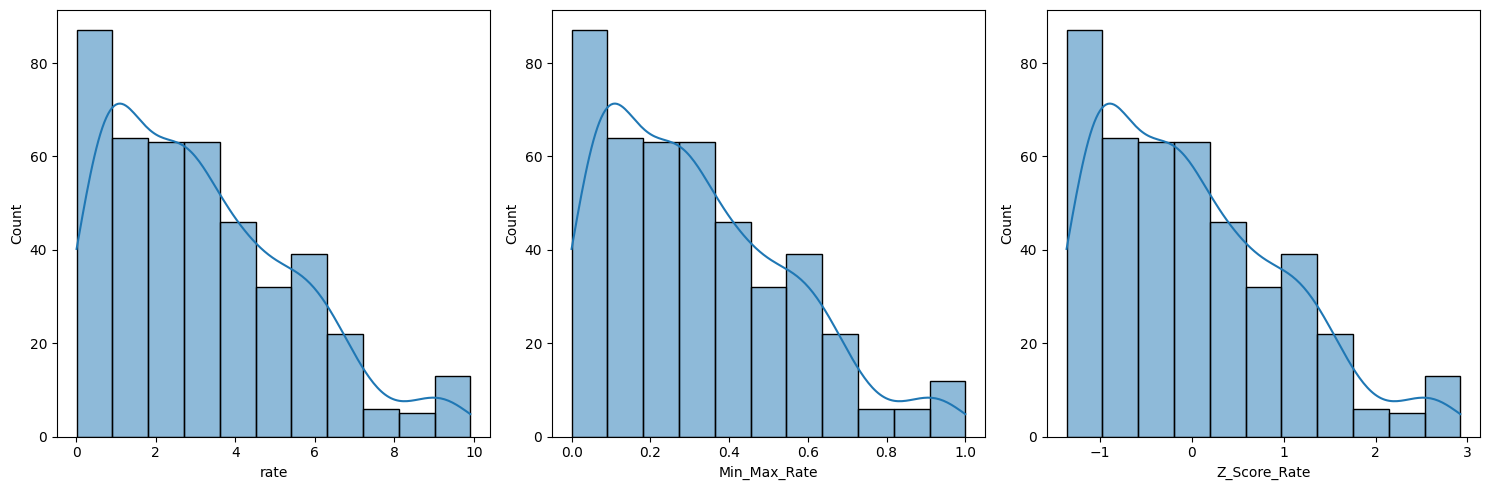

In [61]:
#The work of KDE is to plot something like a PDF
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(df4['rate'], ax=axes[0], kde=True)
sns.histplot(df4['Min_Max_Rate'], ax=axes[1], kde=True)
sns.histplot(df3['Z_Score_Rate'], ax=axes[2], kde=True)

plt.tight_layout()
plt.show()


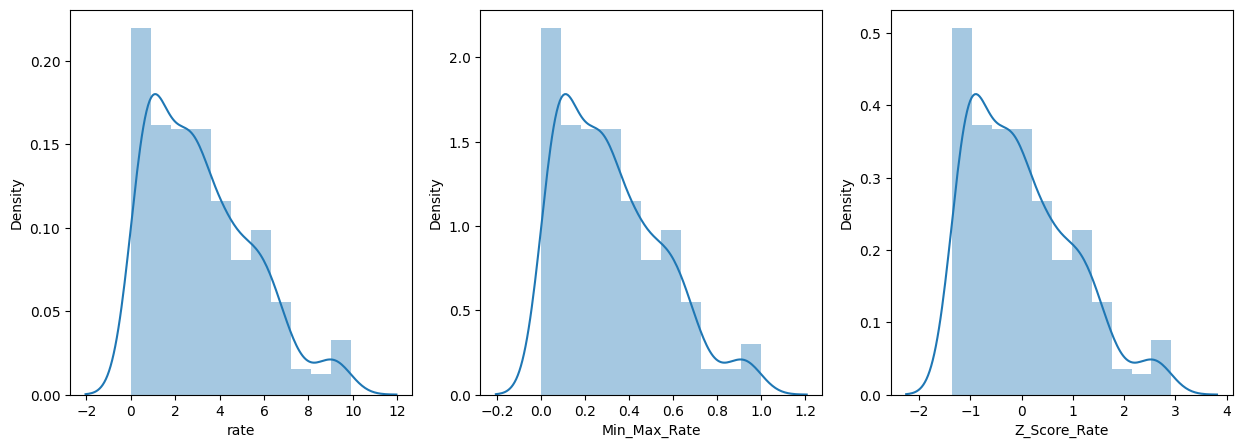

In [66]:
fig, axes = plt.subplots(1,3, figsize=(15,5))

sns.distplot(df4['rate'], ax=axes[0])
sns.distplot(df4['Min_Max_Rate'], ax=axes[1])
sns.distplot(df3['Z_Score_Rate'], ax=axes[2])
plt.show()

We can do the same for loan

**By Sklearn**

In [67]:
from sklearn.preprocessing import MinMaxScaler

In [68]:
min_max = MinMaxScaler()

MinMaxScaled = min_max.fit_transform(df4_num)
MinMaxScaled

array([[9.09866778e-01, 1.69706582e-01],
       [6.40785457e-01, 9.83346550e-02],
       [8.44782126e-01, 5.31324346e-02],
       [8.29794616e-01, 9.75416336e-02],
       [9.36025534e-01, 2.47422680e-01],
       [4.42409104e-01, 1.53053132e-01],
       [3.89814044e-01, 7.50991277e-01],
       [8.39369969e-01, 3.27517843e-01],
       [7.28767694e-01, 4.33782712e-01],
       [2.42228698e-01, 3.37034100e-01],
       [7.34804330e-02, 5.13877875e-01],
       [5.44476825e-01, 3.88580492e-02],
       [5.89647516e-01, 6.74068200e-02],
       [2.05731335e-01, 4.73433783e-01],
       [7.14265890e-01, 2.22839017e-01],
       [4.70441299e-01, 1.01506741e-01],
       [7.90591174e-01, 2.60904044e-01],
       [6.59728004e-01, 2.46629659e-01],
       [7.94476825e-01, 6.18556701e-02],
       [0.00000000e+00, 3.28310864e-01],
       [8.63932834e-01, 1.53053132e-01],
       [2.28420760e-01, 6.34417129e-02],
       [5.45378851e-01, 6.50277557e-02],
       [7.79905634e-01, 5.16256939e-01],
       [6.843602

# Encoding the Categorical Features
There are two ways to encode the categorical data into dummyvariables. Using:

- pd.get_dummies\
- sklearn's in-built function of OneHotEncoder and LabelEncoder

In [74]:
df_loans = df3.copy()


In [75]:
df_loans.drop(columns = ['Z_Score_Rate'], inplace=True)
df_loans.drop(columns = ['Z_Score_Loan'], inplace=True)
df_loans.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


In [77]:
df_loans['loan_start'] = pd.to_datetime(df_loans['loan_start'], format = '%Y-%m-%d')
df_loans['loan_end'] = pd.to_datetime(df_loans['loan_end'], format= '%Y-%m-%d')

In [78]:
df_loans['loan_id'] = df_loans['loan_id'].astype('object')
df_loans['repaid'] = df_loans['repaid'].astype('category')

In [79]:
df_loans.dtypes

,0
client_id,int64
loan_type,object
loan_amount,int64
repaid,category
loan_id,object
loan_start,datetime64[ns]
loan_end,datetime64[ns]
rate,float64


# pd.get_dummies approach

In [80]:
dummy_cat = pd.get_dummies(df_loans['loan_type'], drop_first = True)
dummy_cat.head()

,credit,home,other
0,False,True,False
1,True,False,False
2,False,True,False
3,False,False,False
4,True,False,False


# Using OneHot Encoding

In [81]:
from sklearn.preprocessing import OneHotEncoder

In [83]:
Encoder = OneHotEncoder(drop = 'first').fit(df_loans[['loan_type']])
Encoder.categories_

[array(['cash', 'credit', 'home', 'other'], dtype=object)]

# Using Label Encoding

In [85]:
from sklearn.preprocessing import LabelEncoder

In [86]:
LE = LabelEncoder()
LE_tips = LE.fit(df_loans['loan_type'])

In [87]:
LE_tips.classes_

array(['cash', 'credit', 'home', 'other'], dtype=object)

In [88]:
# transform any new values to Dummy variables via Label Encoder
LE_tips.transform(['other', 'cash', 'home', 'credit'])

array([3, 0, 2, 1])

# Creating a Derived Feature
- We can use the loan_start and loan_end features to calculate the tenure of the loan

In [89]:
import datetime as dt

In [90]:
df_loans['loan_tenure'] = (df_loans['loan_end'] - df_loans['loan_start'])
df_loans.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,loan_tenure
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,613 days
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,635 days
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,519 days
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,879 days
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,684 days


In [92]:
df_loans.dtypes

,0
client_id,int64
loan_type,object
loan_amount,int64
repaid,category
loan_id,object
loan_start,datetime64[ns]
loan_end,datetime64[ns]
rate,float64
loan_tenure,timedelta64[ns]


In [93]:
df_loans['loan_tenure'] = df_loans['loan_tenure'].dt.days
df_loans['loan_tenure']

,loan_tenure
0,613
1,635
2,519
3,879
4,684
...,...
435,928
436,511
437,948
438,633


In [94]:
# If we what the tenure in number of years
df_loans['loan_tenure'] = df_loans['loan_tenure']/365
df_loans['loan_tenure']

,loan_tenure
0,1.679452
1,1.739726
2,1.421918
3,2.408219
4,1.873973
...,...
435,2.542466
436,1.400000
437,2.597260
438,1.734247


# Training and Testing Data

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
Y = df_loans['loan_amount']
X = df_loans.drop('loan_amount', axis=1)

In [97]:
X.head()

,client_id,loan_type,repaid,loan_id,loan_start,loan_end,rate,loan_tenure
0,46109,home,0,10243,2002-04-16,2003-12-20,2.15,1.679452
1,46109,credit,0,10984,2003-10-21,2005-07-17,1.25,1.739726
2,46109,home,1,10990,2006-02-01,2007-07-05,0.68,1.421918
3,46109,cash,1,10596,2010-12-08,2013-05-05,1.24,2.408219
4,46109,credit,1,11415,2010-07-07,2012-05-21,3.13,1.873973


In [98]:
Y.head()

,loan_amount
0,13672
1,9794
2,12734
3,12518
4,14049


In [99]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("The shape of X_train is:", X_train.shape)
print("The shape of X_test is:", X_test.shape)

print('')
print("The shape of Y_train is:", Y_train.shape)
print("The shape of Y_test is:", Y_test.shape)

The shape of X_train is: (352, 8)
The shape of X_test is: (88, 8)

The shape of Y_train is: (352,)
The shape of Y_test is: (88,)


In [100]:
# To check that both the splits represent the overall data we can cpompute the mean of both the samples:
print("The mean of Y_train is:", Y_train.mean())
print("The mean of Y_test is:", Y_test.mean())

The mean of Y_train is: 8111.059659090909
The mean of Y_test is: 7541.738636363636
